In [1]:
"""
Function to align a fits image, then create subtraction image

Date: 07/12/22
Author: Iman Behbehani
"""

import astropy

from astropy.io import fits
from astropy import wcs
from astropy.nddata import Cutout2D
from astropy import units as u
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
from astropy.wcs import WCS
from astropy.visualization import simple_norm

In [2]:
import astroalign as aa

from astropy.coordinates import SkyCoord  # High-level coordinates
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level frames
from astropy.coordinates import Angle, Latitude, Longitude  # Angles
import astropy.units as u

In [3]:
import cv2
import imutils

In [4]:
#import stsci.tools

In [5]:
import glob
#from stsci.tools import teal
#from drizzlepac import tweakreg

#from stwcs import updatewcs


# Let's Subtract <3

In [6]:
# set image 1, image 2

# image 1 1010
hdu1010 = fits.open("/Users/iman/Documents/Midd_Coursework/Fall_2022/704/amnh/HST/j8fw01010_drc.fits")
data1 = hdu1010[1].data #this is already a numpy.ndarray
header10 = hdu1010[0].header
header11 = hdu1010[1].header

# can divide entire array by exposure time to scale
# can't find exposure in header (keyword value for exposure)... ask dave if he knows

#overwrite the wcs information. edit the header
##not sure what this was
#w = wcs.WCS(hdu1010[('sci',1)].header, hdu1010)


# image 2 3010
hdu3010 = fits.open("/Users/iman/Documents/Midd_Coursework/Fall_2022/704/amnh/HST/j8fw03010_drc.fits")
data2 = hdu3010[1].data
header20 = hdu3010[0].header
header21 = hdu3010[1].header

data = np.array(data1)


In [7]:
#making backup. mapping 1010 onto 3010
hdu1010a = hdu1010
data1a = hdu1010[1].data
header10a = hdu1010[0].header #exposure is in here
header11a = hdu1010[1].header #wcs in here. need CRPIX2 to index through some vars

hdu3010a = hdu3010
data2a = hdu3010[1].data
header20a = hdu3010[0].header
header21a = hdu3010[1].header

## mapping 1010 onto 3010.

In [8]:
#world coordinates of 3010
world2 = SkyCoord([(6.0221709, -72.1061628), (6.0853763, -72.1122617),
                         (6.0686179, -72.1047173), (6.0617859, -72.0959946), (6.0745156, -72.0762827)],
                        frame="icrs", unit="deg")

In [9]:
#pixel coordinates of 1010
x = np.array((2084.3935, 670.127, 1062.995, 1241.0084, 1020.5437))

y = np.array((1133.8582, 756.00133, 1282.6364, 1903.5876, 3333.5536))

xy2 = (x,y)

In [10]:
#making the transformation
map1 = astropy.wcs.utils.fit_wcs_from_points(xy2, world2)

print(map1)

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 6.053742889874081  -72.09427474982371  
CRPIX : 1425.0868679745163  2020.505763416005  
CD1_1 CD1_2  : -1.3888710435860634e-05  5.992011424675244e-07  
CD2_1 CD2_2  : 6.047135461961624e-07  1.387680927578187e-05  
NAXIS : 2085  3334


In [11]:
xyworld = map1.pixel_to_world(2084.3935, 1133.8582)
print(xyworld)

print("percent error between mapped coordinate and true coordinate")

#percent errors
pex =  (6.0221681 - 6.0221709)/6.0221709
print(pex)
pey = (72.10616287-72.1061628)/72.1061628
print(pey)

<SkyCoord (ICRS): (ra, dec) in deg
    (6.0221681, -72.10616287)>
percent error between mapped coordinate and true coordinate
-4.6494861178025873e-07
9.707907891390195e-10


In [12]:
print(WCS(header21))

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 6.023119368053695  -72.09247592452458  
CRPIX : 2106.5  2119.0  
CD1_1 CD1_2  : -1.3875636431629e-05  6.06587326894227e-07  
CD2_1 CD2_2  : 6.06587326894227e-07  1.3875636431629e-05  
NAXIS : 4213  4238


### updating hdu1010 header with new wcs

In [13]:
# updating header
hdu1010a[0].header.update(map1.to_header())
hdu1010a[1].header.update(map1.to_header())

In [14]:
# update local variables
data1a = hdu1010a[1].data
header10a = hdu1010a[0].header #exposure is in here
header11a = hdu1010a[1].header #wcs in here

scaling exposure 1

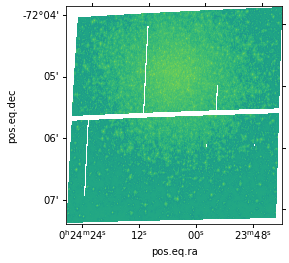

In [15]:
exp = header10["EXPTIME"]
data11 = data1/exp
plt.subplot(projection=map1)
plt.imshow(np.log10(np.abs(data11)))

scaling exposure 2

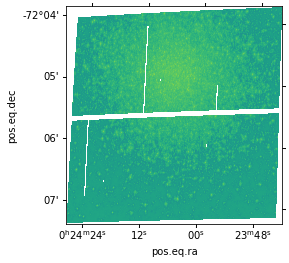

In [16]:
#scaling for exposure
exp2 = header20["EXPTIME"]
data22 = data2/exp2
plt.subplot(projection=map1)
plt.imshow(np.log10(np.abs(data22)))

## taking difference between scaled images and saving to a fits file with a proper header

In [17]:
difference = cv2.subtract(data11, data22)

In [18]:
hduu = fits.HDUList()
hduu.append(fits.PrimaryHDU())

#for img in export_array:
hduu.append(fits.ImageHDU(data=difference))

In [19]:
print(hdu1010a[2])

#giving difference image a proper header
for i in hdu1010a:
      hduu[0].header.update(hdu1010a[i].header)

In [20]:
hduu[0].header.update(map1.to_header())

In [21]:
#saving as new fits file

hduu.writeto('dif.fits')

# making subtraction image the 3010-1010

In [ ]:
difference2 = cv2.subtract(data22, data11)

In [ ]:
hduu2 = fits.HDUList()
hduu2.append(fits.PrimaryHDU())

#for img in export_array:
hduu2.append(fits.ImageHDU(data=difference2))

In [ ]:
print(hdu1010a[2])

#giving difference image a proper headrer
for i in hdu1010a:
      hduu2[0].header.update(hdu1010a[i].header)

In [ ]:
hduu2[0].header.update(map1.to_header())

In [ ]:
#need to change writeout name each time

hduu2.writeto('output2reverse.fits')

# should be able to give it wcs the same way i can update wcs for the other images

test difference efficacy

In [22]:
data11[30,30]-data22[30,30]

-6.669367e-05

In [23]:
#1010-3010
difference[30,30]

-6.669367e-05

This difference is working correctly.

In [24]:
#dn that had already been discovered (in top half) divided by sigma = 0.04 (in top half)
difference[2332, 3509]/0.04

0.006376166129484773

the brightness at a dwarf nova is 0.006*sigma. this is not the predicted relationship

In [35]:
# other known dn, sigma = 0.019
difference[1948, 1868]/0.019

0.014151716114659058

In [33]:
# one i found in bottom half (with sigma = 0.019)
difference[3293, 2023]/0.019

0.7366773329283062

In [31]:
#regular point
np.abs(difference[3287,2020])/0.04

0.061229593120515347

a "noise" point is 0.06*sigma, greater some of the DN vals

for both of these dwarf novae (candidate and not), the pixels do not show the expected relationship with sigma

random space is at higher vals

### trying a denoise method

In [42]:
dif2 = difference
dif2 = np.uint8(dif2)

difdn = cv2.fastNlMeansDenoising(dif2, 10)

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

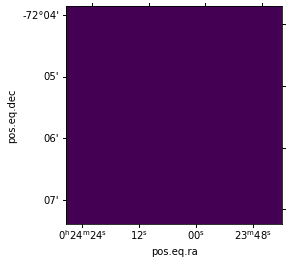

In [44]:
plt.subplot(projection=map1)
#plt.imshow(np.log(((np.abs(difdn)))))
plt.imshow(difdn)
plt.colorbar
#has not changed

In [45]:
count = 0
for i in range(len(difdn)): #top left to right
    for j in range(len(difdn[0])): #top top to bottom
        if((difdn[i,j])!=0):
            print(i,j)
            count+=1
            
print("done")

done


this denoise didn't work. all values are zero
or did it work....... will try a more sensitive function